In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

plt.style.use('seaborn-whitegrid')

from IPython.display import HTML
from IPython.display import display, Image



import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp


# Questions 1

In [65]:
# read student-mat
df = pd.read_csv("student-mat.csv")

In [66]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [115]:
df.shape

(395, 33)

In [114]:
# Q2
# Find the proportion of female students from the MS schoool among those whos mothers has primary school
df[(df['sex'] == 'F') & (df['school'] == 'MS') & (df['Medu'] == 1)].shape[0] / df[(df['school'] == 'MS') & (df['sex'] == 'F')].shape[0]

0.28

In [92]:
# Q3
#What proportion of seudnet from MS College whos father's education is primary?
#df[(df["fedu"]==1)&(df["school"]=="MS")]/df.samplehape[0]
df[(df["Fedu"]==1)&(df["school"]=="MS")].shape[0]/df.shape[0]

0.0379746835443038

In [89]:
# Q4 
# What is the gender of the student with the highest value of age?
df[df['age'] == df['age'].max()]['sex']

247    M
Name: sex, dtype: object

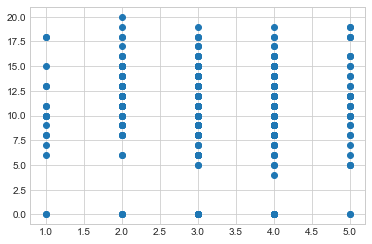

array([[1.        , 0.01130724],
       [0.01130724, 1.        ]])

In [85]:
# Q5
plt.scatter(df['freetime'],df['G3'])
plt.show()
np.corrcoef(df['freetime'],df['G3'])

In [79]:
# Q6
df.groupby('school')['age'].max()

school
GP    22
MS    21
Name: age, dtype: int64

In [80]:
df.groupby('school')['age'].min()

school
GP    15
MS    17
Name: age, dtype: int64

# Quesiton 2

In [97]:
# Q1
# Test if the proportion of married applicants among those with dependents is less than 50%. (write: it is/it is not) Use alpha = 0.05.
dependent_married = df[df['school'] == 'MS']['sex'].value_counts()
n_married_dependent = dependent_married.get('F', 0)
n_not_married_dependent = dependent_married.get('M', 0)
total_dependent = n_married_dependent + n_not_married_dependent

# Proportion of married applicants among those with dependents
p_hat_dependent_married = n_married_dependent / total_dependent
p_hat_dependent_married

0.5434782608695652

In [98]:
p0=0.5
n=total_dependent
successes=n_married_dependent
phat=successes/n
se=np.sqrt(p0*(1-p0)/n)
test_stat=(phat-p0)/se
pVal=(1-ss.norm.cdf(abs(test_stat)))*2
test_stat,pVal

(0.5897678246195881, 0.5553463166714225)

In [107]:
# Q2
m22 = df[df['sex'] =="F"]['age']
res = smw.DescrStatsW(m22)
tStat, pVal, dfreedom = res.ttest_mean(value=16.5, alternative='two-sided')
print('t       = {0:.4f}'.format(tStat))
print('p-value = {0:.3f}'.format(pVal))

t       = 2.7696
p-value = 0.006


In [108]:
# 3
movies = df
movies = df
m1=df[(movies['school'] == "MS")]['G3']
m2=movies[(movies['school'] == "GP")]['G3']

boys  = smw.DescrStatsW(m1)
girls = smw.DescrStatsW(m2)
res = smw.CompareMeans(boys,girls)
tStat, pVal, dfreedom = res.ttest_ind(alternative='two-sided', value=0, usevar='unequal')
print('t       = {0:.3f}'.format(tStat))
print('p-value = {0:.3f}'.format(pVal))



t       = -0.956
p-value = 0.343


In [111]:
# 4
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('G3 ~ C(Medu)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model)
print(anova_table)

             df       sum_sq     mean_sq         F    PR(>F)
C(Medu)     4.0   486.065942  121.516486  6.088436  0.000092
Residual  390.0  7783.842918   19.958572       NaN       NaN


In [72]:
# 2.5
df1=df[ (df['sex'] == "F") & (df['school']=="GP")]
df1.shape

(183, 33)

In [73]:
smw.DescrStatsW(df1['age']).tconfint_mean(alpha=0.05, alternative='two-sided')

(16.408085394404523, 16.75038455095067)

In [67]:
# 2.6
dfF=df.groupby(by='sex').get_group('M')
dfF.shape

(187, 33)

In [70]:
df[(df['age']>16)&(df['sex']=='M')].shape

(93, 33)

In [71]:
smp.proportion_confint(count=93, nobs=187, alpha=0.05, method='normal')

(0.42566384717720457, 0.5689885592399078)

In [74]:
# 2.7  Compute the IQR and the standard deviation of the variable bonus
print(ss.iqr(df['age']))
print(df['age'].std())

2.0
1.2760427246056245


In [75]:
# 2.8
df.groupby('school').size()/df.shape[0]


school
GP    0.883544
MS    0.116456
dtype: float64

In [76]:
p=0.052
x=3
n=20
prob=1-ss.binom.cdf(x,n,p)
print("P(X>=3)= {0:.3f}".format(prob))

P(X>=3)= 0.018


# Q3.1
A call center receives an average of 10 calls per hour. Calculate the probability that the call center will receive exactly 15 calls in the next hour.


In [9]:
ss.poisson.pmf(15,10) # lambda =2   P(X=1)

0.034718069630684245

# Q3.2 (Expon)
A website receives requests from users at a rate of 50 per hour. What is the probability that the time between consecutive requests is less than two minutes?

In [43]:
from scipy.stats import expon

# Given arrival rate
arrival_rate_per_hour = 50

# Convert arrival rate to rate per minute
arrival_rate_per_minute = arrival_rate_per_hour / 60

# Define the scale parameter (mean) of the exponential distribution
scale_parameter = 1 / arrival_rate_per_minute

# Define the upper bound of the time interval (in minutes)
upper_bound_minutes = 2

# Calculate the probability using the cumulative distribution function (CDF)
probability = expon.cdf(upper_bound_minutes, scale=scale_parameter)

print("Probability that the time between consecutive requests is less than two minutes:", probability)


Probability that the time between consecutive requests is less than two minutes: 0.8111243971624382


# Q3.3
Consider average time between customer arrivals is three minutes. We want to find the probability that a new customer arrives in less than one minute after the previous customer.

In [47]:
import scipy.stats as stats

# Average time between arrivals in minutes
average_time_between_arrivals = 3

# Calculate the rate parameter (lambda) for the exponential distribution
rate_parameter = 1 / average_time_between_arrivals

# Calculate the probability that a new customer arrives in less than one minute
probability_less_than_one_minute = stats.expon.cdf(1, scale=1/rate_parameter)

print("Probability of a new customer arriving in less than one minute:", probability_less_than_one_minute)


Probability of a new customer arriving in less than one minute: 0.28346868942621073


# Q3.4
Suppose a shop experiences customer arrivals, and the average time between customers entering the shop is two minutes. We want to find the probability that a new customer arrives in less than one minute after the previous customer.

In [48]:
import scipy.stats as stats

# Average time between arrivals in minutes
average_time_between_arrivals = 2

# Calculate the rate parameter (lambda) for the exponential distribution
rate_parameter = 1 / average_time_between_arrivals

# Calculate the probability that a new customer arrives in less than one minute
probability_less_than_one_minute = stats.expon.cdf(1, scale=1/rate_parameter)

print("Probability of a new customer arriving in less than one minute:", probability_less_than_one_minute)


Probability of a new customer arriving in less than one minute: 0.3934693402873666
